### Data

In [1]:
df = pd.read_csv('data/Traffic_Accidents.csv', encoding = 'utf8')
print(df.shape)
df[:3]

(21161, 58)


,Year,Area,Date,Road,Kilometer Point,Municipality Name,County Name,Province Name,Fatalties,Serious Injuries,Light Injuries,Total Victims,Units Involved,Pedestrains Involved,Bicycles Involved,Mopeds Involved,Motorcycles,Light Vehicles Involved,Heavy Vehicles Involved,Other Units Involved,Unspecified Units Involved,Road Speed Limit,Accident with Hit and Run,Fog Presence,Surrounding Environment,Special Lane Presence,Special Traffic Measures,Weather Conditions,Special Road Functions,Severity of Accident,Influence of Fog,Influence of Environment,Influence of Traffic,Influence of Weather,Influence of Wind Intensity,Influence of Lighting,Influence of Special Measures,Influence of Road Objects,Influence of Road Surface,Influence of Visibility,Intersection Characteristics,Speed Limit Information,Lighting Conditions,Traffic Regulation and Priority,Direction of Road,Subtype of Accident,Subtype of Road Section,Subzone within Area,Road Surface Conditions,Type of Road,Road Ownership,Road's Altimetric Layout,Wind Conditions,Day of the Week Grouping,Hour of Day,Time of Day Grouping,Type of Accident,Day Type
0,2010,Zona urbana,25/01/2010,SE,"999,999.00",CANOVES I SAMALUS,Valles Oriental,Barcelona,0,1,0,1,2,0,0,0,0,1,0,1,0,100.00,No,No n'hi ha,Desmunt,No n'hi ha,No n'hi ha,Bon temps,Sense funció especial,Accident greu,No,No,No,No,No,No,No,No,No,No,Arribant o eixint intersecció fins 50m,Genérica via,"De nit, il·luminació artificial suficient",Sols norma prioritat de pas,Un sol sentit,Encalç,Intersecció en T o Y,Zona urbana,Sec i net,Via urbana( inclou carrer i carrer residencial),NaN,NaN,"Calma, vent molt suau",Feiners,23.33,Nit,Col.lisió de vehicles en marxa,dill-dij
1,2010,Carretera,31/10/2010,N-240,99.90,LLEIDA,Segria,Lleida,0,1,3,4,1,0,0,0,0,1,0,0,0,40.00,No,No n'hi ha,A nivell,No n'hi ha,No n'hi ha,Bon temps,Sense funció especial,Accident greu,No,No,No,No,No,No,No,No,No,No,Dintre intersecció,Senyal velocitat,"De nit, il·luminació artificial suficient",Senyal Stop o cedeix pas,Doble sentit,Resta sortides de via,Giratòria,Carretera,Sec i net,Carretera convencional,Estatal,Pla,"Calma, vent molt suau",CapDeSetmana,1.00,Nit,Sortida de la calcada sense especificar,dg
2,2010,Carretera,17/05/2010,N-II,708.70,FORNELLS DE LA SELVA,Girones,Girona,1,0,2,3,4,0,0,0,0,2,2,0,0,80.00,No,No n'hi ha,A nivell,No n'hi ha,No n'hi ha,Bon temps,Variant,Accident mortal,No,No,No,No,No,No,No,No,No,No,En secció,Senyal velocitat,"De dia, dia clar",NaN,Doble sentit,Col·lisió frontal,NaN,Carretera,Sec i net,Carretera convencional,Estatal,Rampa o pendent,"Calma, vent molt suau",Feiners,15.27,Tarda,Col.lisió de vehicles en marxa,dill-dij


In [2]:
df['Accidents'] = 1
cols = df.columns
df.columns = [c.strip() for c in cols]

In [3]:
df.count()

Year                               21161
Area                               21161
Date                               21161
Road                               21161
Kilometer Point                    21160
Municipality Name                  21161
County Name                        21161
Province Name                      21161
Fatalties                          21161
Serious Injuries                   21161
Light Injuries                     21161
Total Victims                      21161
Units Involved                     21161
Pedestrains Involved               21161
Bicycles Involved                  21161
Mopeds Involved                    21161
Motorcycles                        21161
Light Vehicles Involved            21161
Heavy Vehicles Involved            21161
Other Units Involved               21161
Unspecified Units Involved         21161
Road Speed Limit                   18519
Accident with Hit and Run          21161
Fog Presence                       21161
Surrounding Envi

In [74]:
# for f in df.columns:
#     display(df[f].value_counts()[:10])
#     print('------')

### 1. What are the overall trends in traffic accidents, fatalities, and serious injuries in Catalonia from 2010-2021?

In [5]:
feats_vals = '''
Accidents
Total Victims
Serious Injuries 
Fatalties
'''
feats_vals = [f.strip() for f in feats_vals.split('\n') if f.strip() != '']

# yearly sum
feats1 = ['Year']
df2 = df.groupby(feats1)[feats_vals].sum()
df2['x'] = range(len(df2))
# df2.index = df2.index.astype(str)
df2

,Accidents,Total Victims,Serious Injuries,Fatalties,x
Year,,,,,
2010,1984,3229,2007,339,0
2011,1868,2903,1866,280,1
2012,1950,3133,1980,274,2
2013,1902,2885,1901,232,3
2014,1912,2878,1888,230,4
2015,1901,2899,1900,261,5
2016,1793,2785,1839,231,6
2017,1719,2634,1711,240,7
2018,1745,2665,1736,260,8


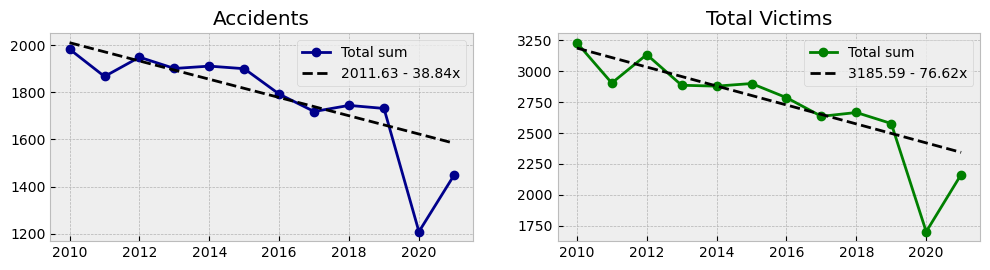

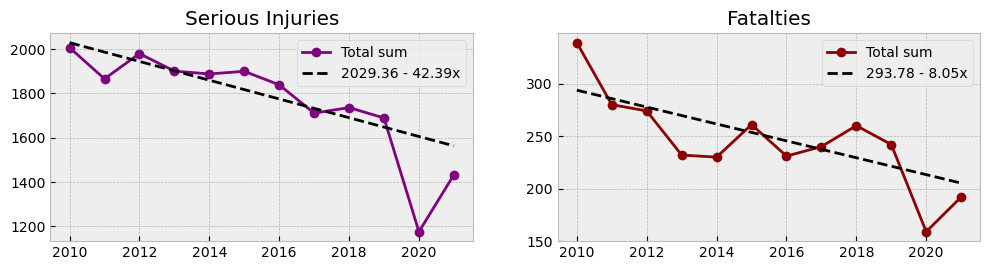

In [6]:
list_color = ['darkblue','green','purple','darkred']
# df2.plot(subplots = True, layout = (2,2), figsize = (12,6), style = 'o-', color = list_color)

# plotting
def plot_yearly(i, feat):
    # trend
    filt = df2.index != 2020
    x = np.polyfit(df2[filt].x, df2[filt][feat], 1)
    p = np.poly1d(x)
    a1 = x[1].round(2)
    a2 = x[0].round(2)
    coef = f'{a1} - {-a2}x' if a2 < 0 else f'{a1} + {a2}x' 
    df2['Prediction'] = df2.x.map(p)
    # plot
    df2[feat].plot(ax = ax[i%2], title = feat, color = list_color[i], xlabel = '', style = 'o-')
    df2.Prediction.plot(ax = ax[i%2], title = feat, color = 'black', style = '--', xlabel = '')
    _ = ax[i%2].legend(['Total sum', coef])
    
for i, feat in enumerate(feats_vals):
    if i%2 == 0:
        _,ax = plt.subplots(1,2, figsize = (12,2.7))
    plot_yearly(i, feat)

plt.show()

### 2. How have traffic accident patterns (frequency, severity) changed yearly from 2010 to 2021?

In [7]:
feats_vals = '''
Accidents
Units Involved
Total Victims
Serious Injuries 
Fatalties
'''
feats_vals = [f.strip() for f in feats_vals.split('\n') if f.strip() != '']

# yearly ratios
feats1 = ['Year']
df2 = df.groupby(feats1)[feats_vals].sum()

for f in df2.columns[1:]:
    df2[f + ' per accident'] = df2[f] / df2['Accidents']
    del df2[f]
del df2['Accidents']
df2

,Units Involved per accident,Total Victims per accident,Serious Injuries per accident,Fatalties per accident
Year,,,,
2010,1.94,1.63,1.01,0.17
2011,1.89,1.55,1.00,0.15
2012,1.91,1.61,1.02,0.14
2013,1.88,1.52,1.00,0.12
2014,1.87,1.51,0.99,0.12
2015,1.86,1.52,1.00,0.14
2016,1.88,1.55,1.03,0.13
2017,1.92,1.53,1.00,0.14
2018,1.90,1.53,0.99,0.15


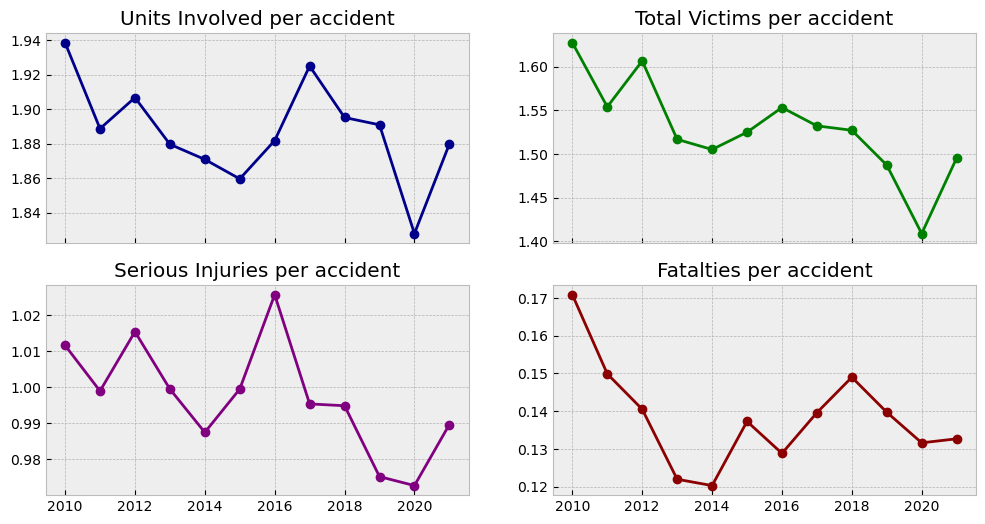

In [8]:
_ = df2.plot(subplots = True, title = list(df2.columns), legend = False, layout = (2,2), figsize = (12,6), style = 'o-', color = list_color, xlabel = '')

### 3. Geographical Insights

In [9]:
# read shape file
import geopandas as gpd
file1 = 'data/geo/shapefiles_catalunya_comarcas.shp'
df_shape = gpd.read_file(file1).rename(columns = {'nom_comar':'County Name'})[['County Name','geometry']].sort_values('County Name')
print(df_shape.shape)
df_shape[:3]

(41, 2)


,County Name,geometry
38,Alt Camp,"POLYGON ((1.35221 41.42784, 1.35576 41.42749, ..."
39,Alt Empordà,"MULTIPOLYGON (((2.73112 42.26371, 2.73035 42.2..."
40,Alt Penedès,"POLYGON ((1.60599 41.51315, 1.61461 41.51325, ..."


In [10]:
# read demographics
df_stat = pd.read_html('https://www.idescat.cat/indicadors/?id=aec&n=15227&lang=en')[0].rename(columns = {'Unnamed: 0':'County Name'})
dict_repl = {
    "Aran": "Val d'Aran"
}
df_stat['County Name'] = df_stat['County Name'].map(lambda x: dict_repl[x] if x in dict_repl else x)
print(df_stat.shape)
df_stat[:3]

(58, 4)


,County Name,Population,Surface area km²,Density (inhabitants/km²)
0,Alt Camp,46076,538,85.6
1,Alt Empordà,146766,1358,108.1
2,Alt Penedès,112460,593,189.8


In [11]:
# merge
df_shape2 = df_shape.merge(df_stat, how = 'left')
print(df_shape2[df_shape2.Population.isnull()].shape)
print(df_shape2.shape)
df_shape2[:3]

(0, 5)
(41, 5)


,County Name,geometry,Population,Surface area km²,Density (inhabitants/km²)
0,Alt Camp,"POLYGON ((1.35221 41.42784, 1.35576 41.42749, ...",46076,538,85.6
1,Alt Empordà,"MULTIPOLYGON (((2.73112 42.26371, 2.73035 42.2...",146766,1358,108.1
2,Alt Penedès,"POLYGON ((1.60599 41.51315, 1.61461 41.51325, ...",112460,593,189.8


In [12]:
# number of accidents
feats_vals = ['Accidents']
feats_gr   = ['County Name']

df2 = df.groupby(feats_gr)[feats_vals].sum().reset_index()
dict_repl = {
    'Alt Emporda': 'Alt Empordà',
    'Alt Penedes': 'Alt Penedès',
    'Alta Ribagorca': 'Alta Ribagorça',
    'Baix Emporda': 'Baix Empordà',
    'Baix Penedes': 'Baix Penedès',
    'Barcelones': 'Barcelonès',
    'Bergueda': 'Berguedà',
    'Conca de Barbera': 'Conca de Barberà',
    'Girones': 'Gironès',
    # 'Moianès': '',
    'Montsia': 'Montsià',
    'Pallars Jussa': 'Pallars Jussà',
    'Pallars Sobira': 'Pallars Sobirà',
    'Ripolles': 'Ripollès',
    'Segria': 'Segrià',
    'Solsones': 'Solsonès',
    'Tarragones': 'Tarragonès',
    'Valles Occidental': 'Vallès Occidental',
    'Valles Oriental': 'Vallès Oriental',
}
df2['County Name'] = df2['County Name'].map(lambda x: dict_repl[x] if x in dict_repl else x)
print(df2.shape)
df2[:3]

(42, 2)


,County Name,Accidents
0,Alt Camp,190
1,Alt Empordà,722
2,Alt Penedès,499


In [13]:
# merge
df3 = df_shape2.merge(df2, how = 'left')

df3['Population'] = df3['Population'].astype(int)
df3['Surface area km²'] = df3['Surface area km²'].astype(int)
df3['Density (inhabitants/km²)'] = df3['Density (inhabitants/km²)'].astype(float)

df3.to_pickle('data/df_geo.pkl')
print(df3[df3.Accidents.isnull()].shape)
print(df3.shape)
df3[:3]

(0, 6)
(41, 6)


,County Name,geometry,Population,Surface area km²,Density (inhabitants/km²),Accidents
0,Alt Camp,"POLYGON ((1.35221 41.42784, 1.35576 41.42749, ...",46076,538,85.60,190
1,Alt Empordà,"MULTIPOLYGON (((2.73112 42.26371, 2.73035 42.2...",146766,1358,108.10,722
2,Alt Penedès,"POLYGON ((1.60599 41.51315, 1.61461 41.51325, ...",112460,593,189.80,499


In [14]:
# plots
df_corr = df3.iloc[:,2:].corr()
df_corr

,Population,Surface area km²,Density (inhabitants/km²),Accidents
Population,1.00,-0.32,0.93,0.97
Surface area km²,-0.32,1.00,-0.32,-0.25
Density (inhabitants/km²),0.93,-0.32,1.00,0.83
Accidents,0.97,-0.25,0.83,1.00


Text(0, 0.5, 'Accidents')

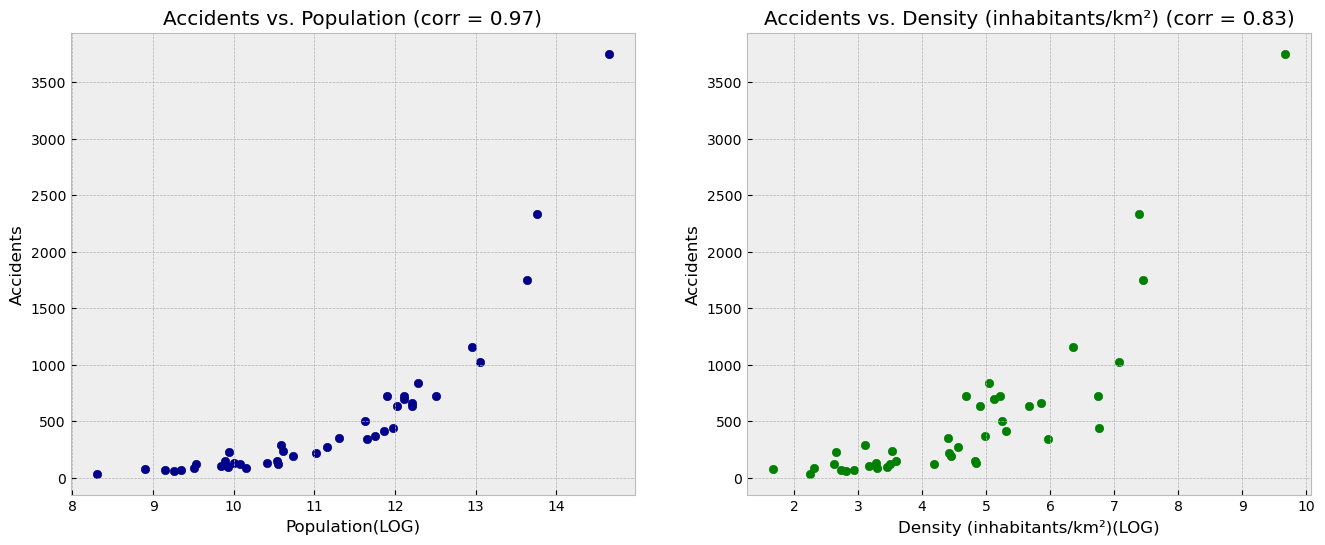

In [15]:
_,ax = plt.subplots(1,2, figsize = (16,6))

feat = 'Population'
_ = ax[0].scatter(x = df3[feat].map(np.log), y = df3.Accidents, color = 'darkblue')
cor = df_corr[feat]['Accidents']
ax[0].set_title(f'Accidents vs. {feat} (corr = {cor:.2f})')
ax[0].set_xlabel(feat + '(LOG)')
ax[0].set_ylabel('Accidents')

feat = 'Density (inhabitants/km²)'
_ = ax[1].scatter(x = df3[feat].map(np.log), y = df3.Accidents, color = 'green')
cor = df_corr[feat]['Accidents']
ax[1].set_title(f'Accidents vs. {feat} (corr = {cor:.2f})')
ax[1].set_xlabel(feat + '(LOG)')
ax[1].set_ylabel('Accidents')

In [16]:
df3.sort_values('Population', ascending = True)[:5]

,County Name,geometry,Population,Surface area km²,Density (inhabitants/km²),Accidents
4,Alta Ribagorça,"POLYGON ((0.82620 42.60515, 0.82805 42.60555, ...",4019,427,9.40,35
25,Pallars Sobirà,"POLYGON ((0.96112 42.63141, 0.96103 42.63150, ...",7288,1378,5.30,73
28,Priorat,"POLYGON ((0.81260 41.32708, 0.81270 41.32707, ...",9360,499,18.80,65
38,Val d'Aran,"POLYGON ((0.66731 42.82594, 0.66665 42.82619, ...",10496,634,16.60,61
36,Terra Alta,"POLYGON ((0.30281 41.16439, 0.30033 41.16682, ...",11473,743,15.40,68


In [17]:
df3.sort_values('Density (inhabitants/km²)', ascending = True)[:5]

,County Name,geometry,Population,Surface area km²,Density (inhabitants/km²),Accidents
25,Pallars Sobirà,"POLYGON ((0.96112 42.63141, 0.96103 42.63150, ...",7288,1378,5.30,73
4,Alta Ribagorça,"POLYGON ((0.82620 42.60515, 0.82805 42.60555, ...",4019,427,9.40,35
24,Pallars Jussà,"MULTIPOLYGON (((0.92165 42.48490, 0.92162 42.4...",13409,1343,10.00,87
34,Solsonès,"MULTIPOLYGON (((1.35842 42.07417, 1.35804 42.0...",13725,1001,13.70,118
3,Alt Urgell,"MULTIPOLYGON (((1.16524 42.21967, 1.16487 42.2...",20762,1447,14.30,229


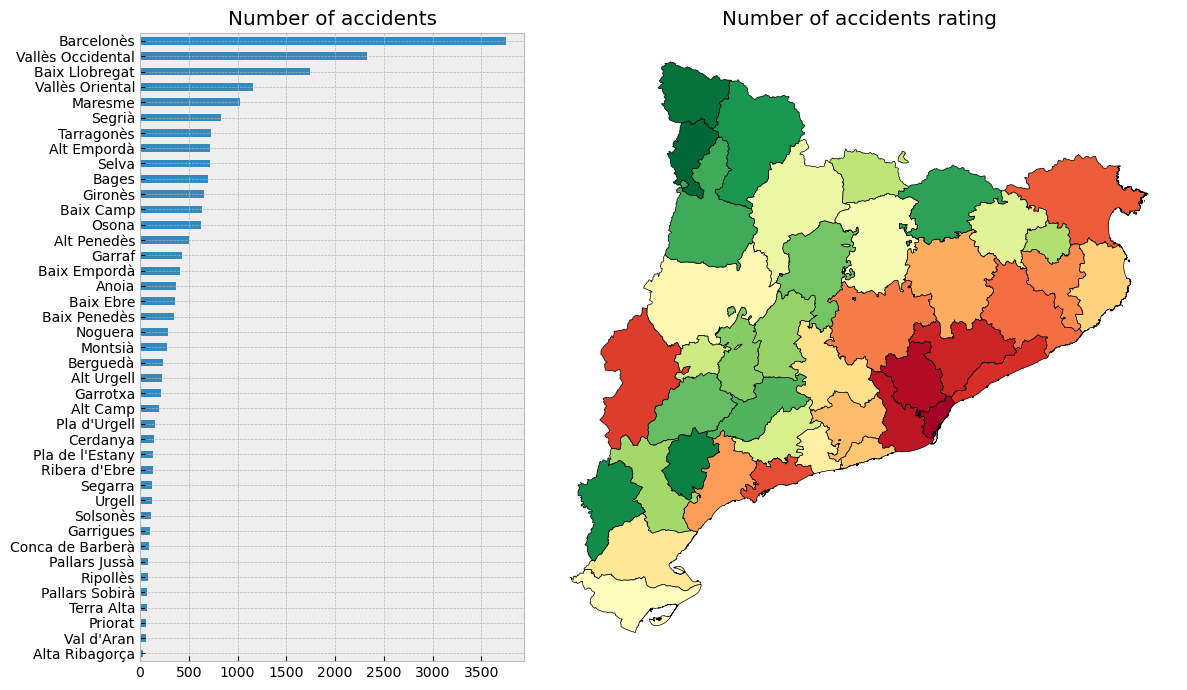

In [18]:
# plot 1
df3['Accidents_rank'] = df3['Accidents'].rank()
_, ax = plt.subplots(1,2, figsize = (12,7), width_ratios = (1.2,2))
_ = df3.set_index('County Name')['Accidents'].sort_values().plot(kind = 'barh', ax = ax[0], ylabel = '', title = 'Number of accidents')
_ = df3.plot(ax = ax[1], edgecolor="black", column = 'Accidents_rank', k = 5, legend = False, cmap = 'RdYlGn_r')
_ = plt.axis('off')
_ = plt.title('Number of accidents rating')
plt.tight_layout()

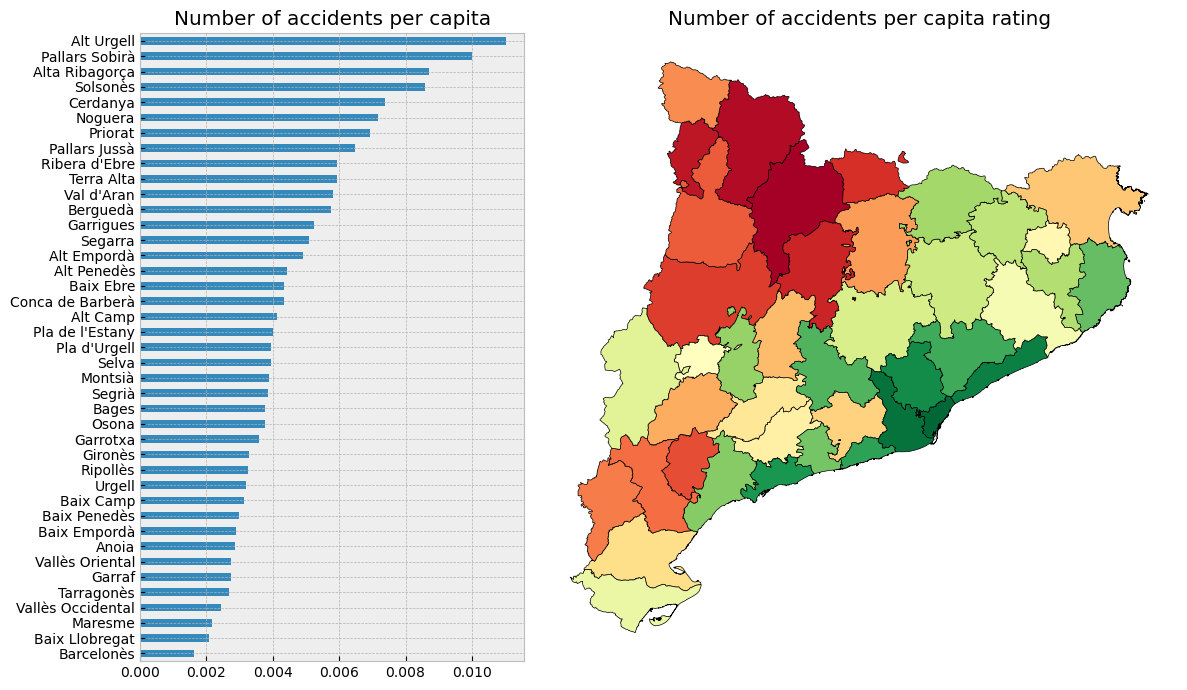

In [19]:
# plot 2
df3['Accidents2'] = df3['Accidents'] / df3['Population']
df3['Accidents2_rank'] = df3['Accidents2'].rank()
_, ax = plt.subplots(1,2, figsize = (12,7), width_ratios = (1.2,2))
_ = df3.set_index('County Name')['Accidents2'].sort_values().plot(kind = 'barh', ax = ax[0], ylabel = '', title = 'Number of accidents per capita')
_ = df3.plot(ax = ax[1], edgecolor="black", column = 'Accidents2_rank', k = 5, legend = False, cmap = 'RdYlGn_r')
_ = plt.axis('off')
_ = plt.title('Number of accidents per capita rating')
plt.tight_layout()

### 4. Accident Severity

In [26]:
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df.Date.dt.month
df['Hour'] = df['Hour of Day'].map(np.floor).astype(int)
df['Weekday'] = df.Date.dt.dayofweek + 1

df['dt_month'] = pd.to_datetime(df.Date.astype(str).str[:7])

In [27]:
pd.to_datetime(dt.now()).dayofweek

0

In [28]:
df['Fatalties'].value_counts().sort_index()

Fatalties
0     18488
1      2477
2       153
3        29
4        10
5         2
7         1
13        1
Name: count, dtype: int64

In [29]:
df['Serious Injuries'].value_counts().sort_index()

Serious Injuries
0      2121
1     17415
2      1319
3       218
4        58
5        18
6         8
7         1
8         1
9         1
23        1
Name: count, dtype: int64

In [30]:
f1 = df['Fatalties'] > 0
f2 = df['Serious Injuries'] > 1
df[f1].shape, df[f2].shape, df[f1|f2].shape

((2673, 64), (1625, 64), (4123, 64))

In [31]:
filt = f1
df['target'] = 0
df.loc[filt,'target'] = 1

df.target.value_counts()

target
0    18488
1     2673
Name: count, dtype: int64

In [44]:
prob1 = df.target.value_counts(normalize = True)[1]
prob1

0.1263172817919758

In [45]:
def show_lift(feats_gr):
    df_out = pd.DataFrame()
    for feat in feats_gr:
        # print('------')
        # x1 = 100*df[feat].value_counts(normalize = True).reset_index().set_index(feat).rename(columns = {'proportion':'prob1'})
        # x2 = 100*df[filt][feat].value_counts(normalize = True)
        # x1['prob2'] = x2
        # x1['lift'] = x1['prob2'] / x1['prob1']
        # x1 = x1[x1.prob2 > 0.5]
        # display(x1.sort_values('lift', ascending=False).reset_index())
        
        df2 = df.groupby([feat,'target']).size().unstack()
        df2['all'] = df2.sum(axis = 1)

        df2['perc'] = df2['all']/df2['all'].sum()
        df2['prob1'] = df2[1]/df2['all']
        df2['lift'] = df2['prob1'] / prob1

        df2 = df2.reset_index().rename(columns = {feat: 'value'})
        df2.insert(0,'feature',feat)
        df_out = pd.concat([df_out, df2])
    return df_out

In [57]:
feats_gr = '''
Month
Weekday
Hour

Area
Subzone within Area
Road Speed Limit
Special Lane Presence
Special Traffic Measures
Special Road Functions 
Intersection Characteristics 
Speed Limit Information
Lighting Conditions 
Traffic Regulation and Priority 
Direction of Road
Subtype of Road Section 
Road Surface Conditions 
Type of Road
Road Ownership 
Road's Altimetric Layout

Fog Presence 
Surrounding Environment
Weather Conditions 
Wind Conditions 

Type of Accident 
Subtype of Accident
Severity of Accident 
Accident with Hit and Run

Heavy Vehicles Involved
Bicycles Involved
Mopeds Involved
Motorcycles
'''

feats_gr = [f.strip() for f in feats_gr.split('\n') if f.strip() != '']
df_out = show_lift(feats_gr)
print(df_out.shape)
df_out[:15]

(211, 8)


target,feature,value,0,1,all,perc,prob1,lift
0,Month,1,"1,398.00",191.00,"1,589.00",0.08,0.12,0.95
1,Month,2,"1,364.00",186.00,"1,550.00",0.07,0.12,0.95
2,Month,3,"1,459.00",220.00,"1,679.00",0.08,0.13,1.04
3,Month,4,"1,454.00",192.00,"1,646.00",0.08,0.12,0.92
4,Month,5,"1,684.00",213.00,"1,897.00",0.09,0.11,0.89
5,Month,6,"1,703.00",226.00,"1,929.00",0.09,0.12,0.93
6,Month,7,"1,774.00",263.00,"2,037.00",0.10,0.13,1.02
7,Month,8,"1,529.00",249.00,"1,778.00",0.08,0.14,1.11
8,Month,9,"1,494.00",247.00,"1,741.00",0.08,0.14,1.12
9,Month,10,"1,731.00",254.00,"1,985.00",0.09,0.13,1.01


In [58]:
# view in Excel
df_out.to_clipboard()

In [64]:
# df_out

### 5. On what days of the week and times of day do most accidents occur? Are there notable differences between weekdays and weekends?

In [51]:
# df.groupby(['Time of Day Grouping','hour']).size()

In [52]:
# df.groupby(['Day of the Week Grouping','weekday']).size()

In [59]:
feats_vals = '''
Accidents
Total Victims
Serious Injuries 
Fatalties
'''
feats_vals = [f.strip() for f in feats_vals.split('\n') if f.strip() != '']

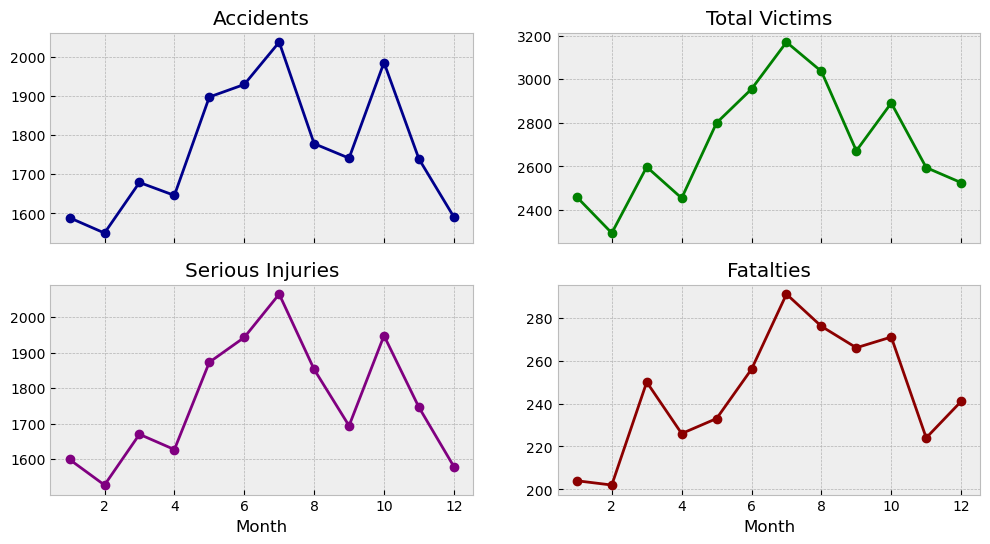

In [60]:
feats1 = ['Month']
df2 = df.groupby(feats1)[feats_vals].sum()
_ = df2.plot(subplots = True, title = list(df2.columns), legend = False, layout = (2,2), figsize = (12,6), style = 'o-', color = list_color)

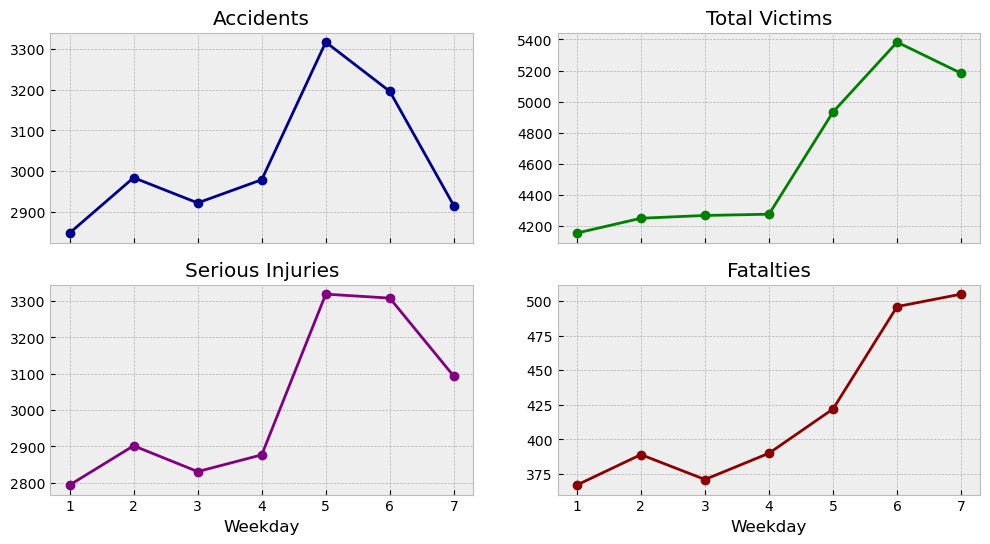

In [61]:
feats1 = ['Weekday']
df2 = df.groupby(feats1)[feats_vals].sum()
_ = df2.plot(subplots = True, title = list(df2.columns), legend = False, layout = (2,2), figsize = (12,6), style = 'o-', color = list_color)

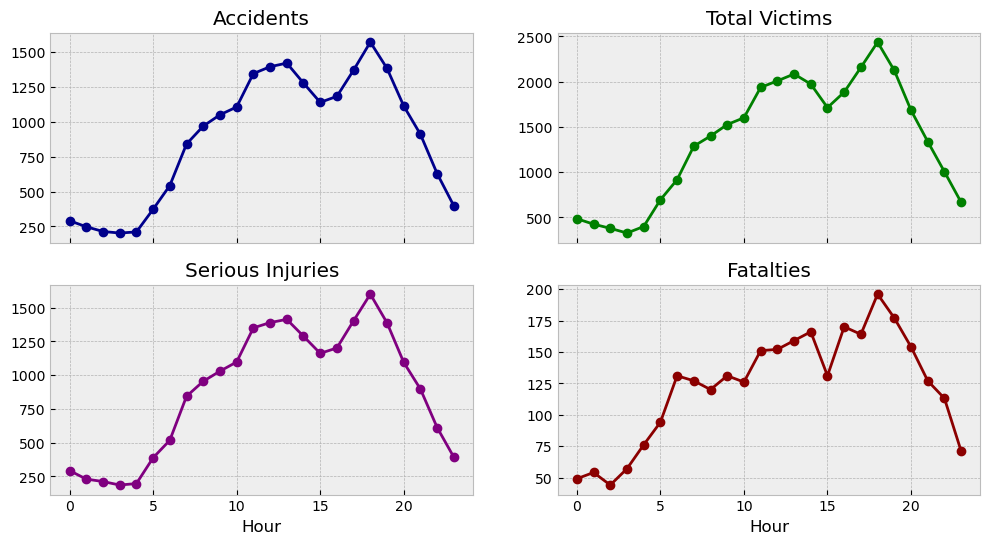

In [62]:
feats1 = ['Hour']
df2 = df.groupby(feats1)[feats_vals].sum()
_ = df2.plot(subplots = True, title = list(df2.columns), legend = False, layout = (2,2), figsize = (12,6), style = 'o-', color = list_color)

### 6. Temporal Clustering

,Pedestrains Involved,Bicycles Involved,Mopeds Involved,Motorcycles,Light Vehicles Involved,Heavy Vehicles Involved,Other Units Involved,cluster
Month,,,,,,,,
1,15.32,3.61,4.68,18.71,49.45,7.22,1.01,0
2,14.65,4.14,3.87,20.29,49.12,6.64,1.30,0
3,14.70,4.11,3.98,20.69,48.03,7.02,1.47,0
4,12.02,4.99,4.11,23.59,47.54,6.68,1.08,1
5,12.65,5.41,4.49,22.98,47.38,6.01,1.09,1
6,11.66,5.80,4.01,22.46,48.14,6.67,1.26,1
7,10.58,5.70,4.72,23.01,47.98,6.52,1.48,1
8,10.06,5.84,4.71,22.58,49.03,6.37,1.41,1
9,11.90,4.73,4.61,23.21,47.14,7.23,1.17,1


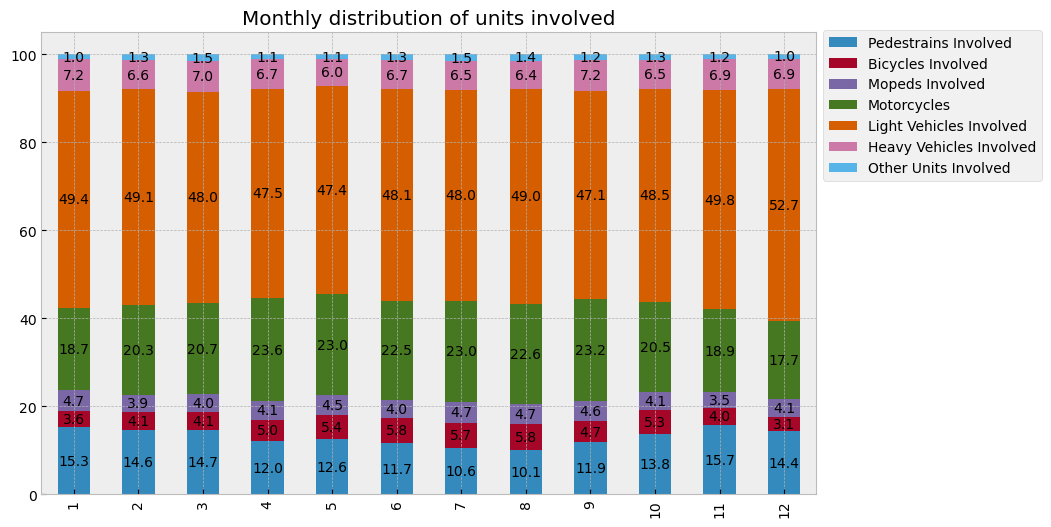

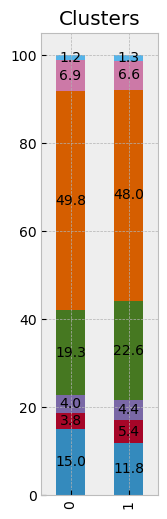

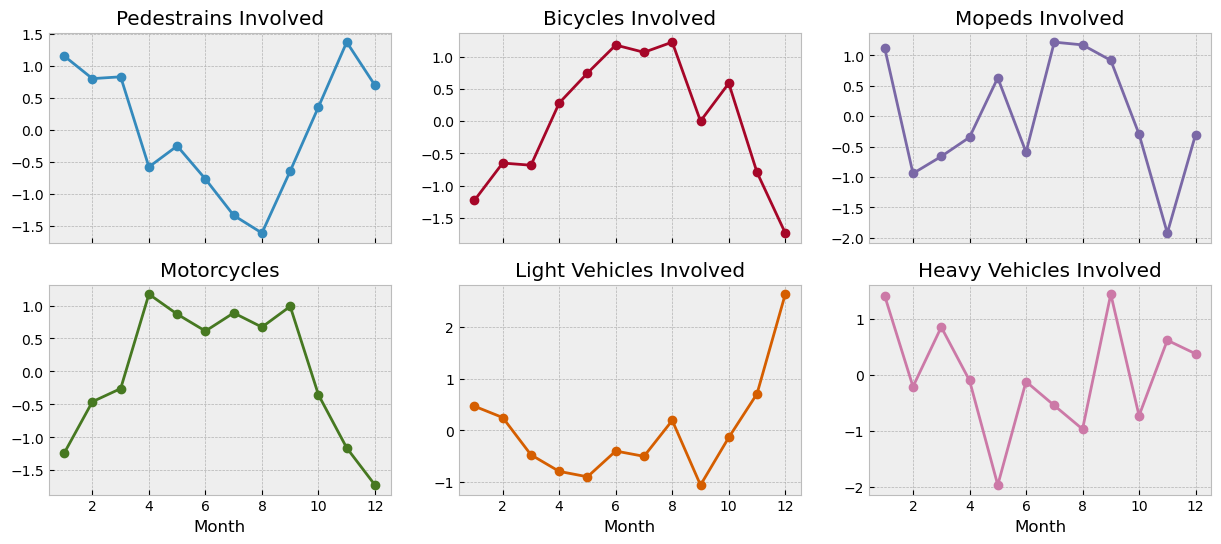

In [70]:
# Monthly distribution
feats_ag = ''' 
Pedestrains Involved
Bicycles Involved
Mopeds Involved
Motorcycles
Light Vehicles Involved 
Heavy Vehicles Involved
Other Units Involved
'''
feats_ag = [f.strip() for f in feats_ag.split('\n') if f.strip() != '']

# calculate
feats_gr = ['Month']
df2 = df.groupby(feats_gr)[feats_ag].sum()
df2 = 100*df2.apply(lambda x: x / x.sum(), axis = 1)

x = df2.copy()
for f in x.columns:
    x[f] = (x[f] - x[f].mean())/x[f].std()
    
# plotting
p = df2.plot(figsize = (10,6), kind = 'bar', stacked = True, legend = True, title = 'Monthly distribution of units involved', xlabel = '')
_ = p.legend(bbox_to_anchor=(1., 1.02))
for c in p.containers:
    labels = [f'{v.get_height():.1f}' if v.get_height() > 0 else '' for v in c]
    p.bar_label(c, labels=labels, label_type='center')
    
# Kmeans clustering
from sklearn.cluster import KMeans
np.random.seed(2017)
kmeans = KMeans(n_clusters=2)
kmeans.fit(x)
df2['cluster'] = kmeans.labels_
display(df2)

# plot clusters
df3 = df2.groupby('cluster').mean()
p = df3.plot(figsize = (1.5,6), kind = 'bar', stacked = True, legend = False, title = 'Clusters', xlabel = '')
# _ = p.legend(bbox_to_anchor=(1., 1.))
for c in p.containers:
    labels = [f'{v.get_height():.1f}' if v.get_height() > 0 else '' for v in c]
    p.bar_label(c, labels=labels, label_type='center')
    
# plot z-scores
x1 = x.iloc[:,:-1]
_ = x1.plot(subplots = True, title = list(x1.columns), legend = False, layout = (2,3), figsize = (15,6), style = 'o-')

,Pedestrains Involved,Bicycles Involved,Mopeds Involved,Motorcycles,Light Vehicles Involved,Heavy Vehicles Involved,Other Units Involved,cluster
Year,,,,,,,,
2010,13.23,3.20,6.76,17.24,50.86,7.85,0.86,0
2011,14.48,3.88,5.73,18.57,48.95,7.28,1.11,0
2012,13.39,4.38,4.90,19.37,50.22,6.70,1.05,0
2013,13.85,4.31,4.25,20.08,50.10,6.24,1.17,0
2014,12.80,4.64,4.61,22.37,48.56,6.43,0.59,0
2015,13.55,4.13,3.85,22.74,48.01,7.02,0.71,0
2016,12.89,5.57,3.76,22.61,47.90,6.28,0.98,0
2017,12.06,4.68,3.57,22.06,50.17,6.62,0.85,0
2018,13.09,4.81,3.36,22.10,49.11,6.20,1.33,0


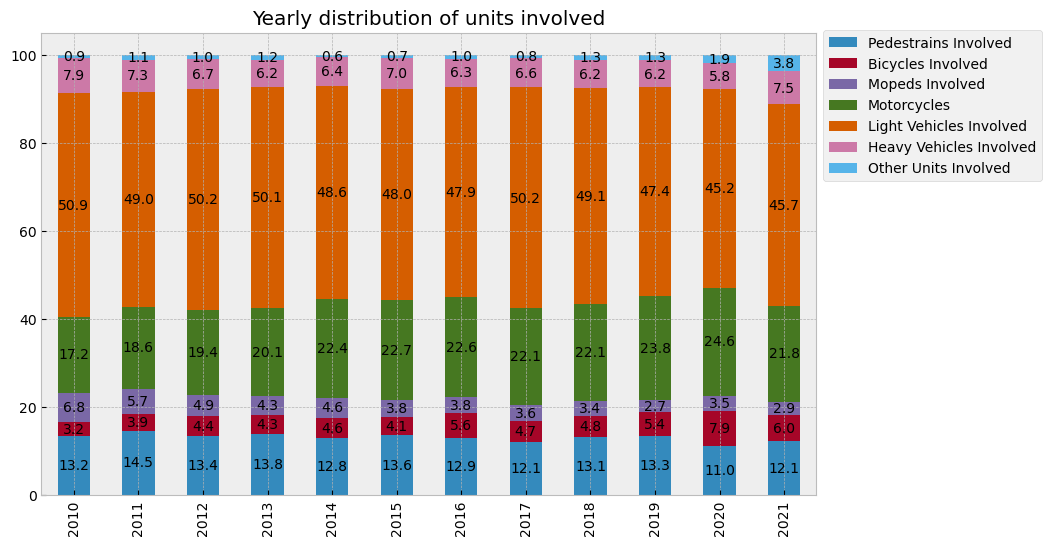

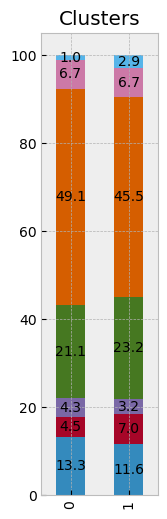

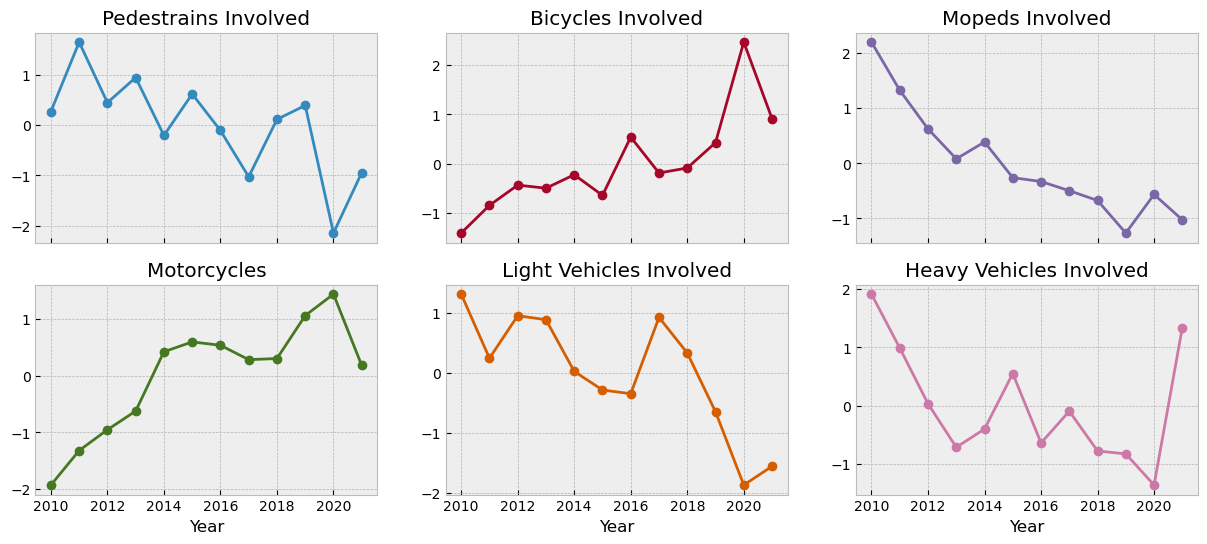

In [72]:
# Yearly distribution
feats_ag = ''' 
Pedestrains Involved
Bicycles Involved
Mopeds Involved
Motorcycles
Light Vehicles Involved 
Heavy Vehicles Involved
Other Units Involved
'''
feats_ag = [f.strip() for f in feats_ag.split('\n') if f.strip() != '']

# calculate
feats_gr = ['Year']
df2 = df.groupby(feats_gr)[feats_ag].sum()
df2 = 100*df2.apply(lambda x: x / x.sum(), axis = 1)

x = df2.copy()
for f in x.columns:
    x[f] = (x[f] - x[f].mean())/x[f].std()
    
# plotting
p = df2.plot(figsize = (10,6), kind = 'bar', stacked = True, legend = True, title = 'Yearly distribution of units involved', xlabel = '')
_ = p.legend(bbox_to_anchor=(1., 1.02))
for c in p.containers:
    labels = [f'{v.get_height():.1f}' if v.get_height() > 0 else '' for v in c]
    p.bar_label(c, labels=labels, label_type='center')
    
# Kmeans clustering
from sklearn.cluster import KMeans
np.random.seed(2017)
kmeans = KMeans(n_clusters=2)
kmeans.fit(x)
df2['cluster'] = kmeans.labels_
display(df2)

# plot clusters
df3 = df2.groupby('cluster').mean()
p = df3.plot(figsize = (1.5,6), kind = 'bar', stacked = True, legend = False, title = 'Clusters', xlabel = '')
# _ = p.legend(bbox_to_anchor=(1., 1.))
for c in p.containers:
    labels = [f'{v.get_height():.1f}' if v.get_height() > 0 else '' for v in c]
    p.bar_label(c, labels=labels, label_type='center')
    
# plot z-scores
x1 = x.iloc[:,:-1]
_ = x1.plot(subplots = True, title = list(x1.columns), legend = False, layout = (2,3), figsize = (15,6), style = 'o-')

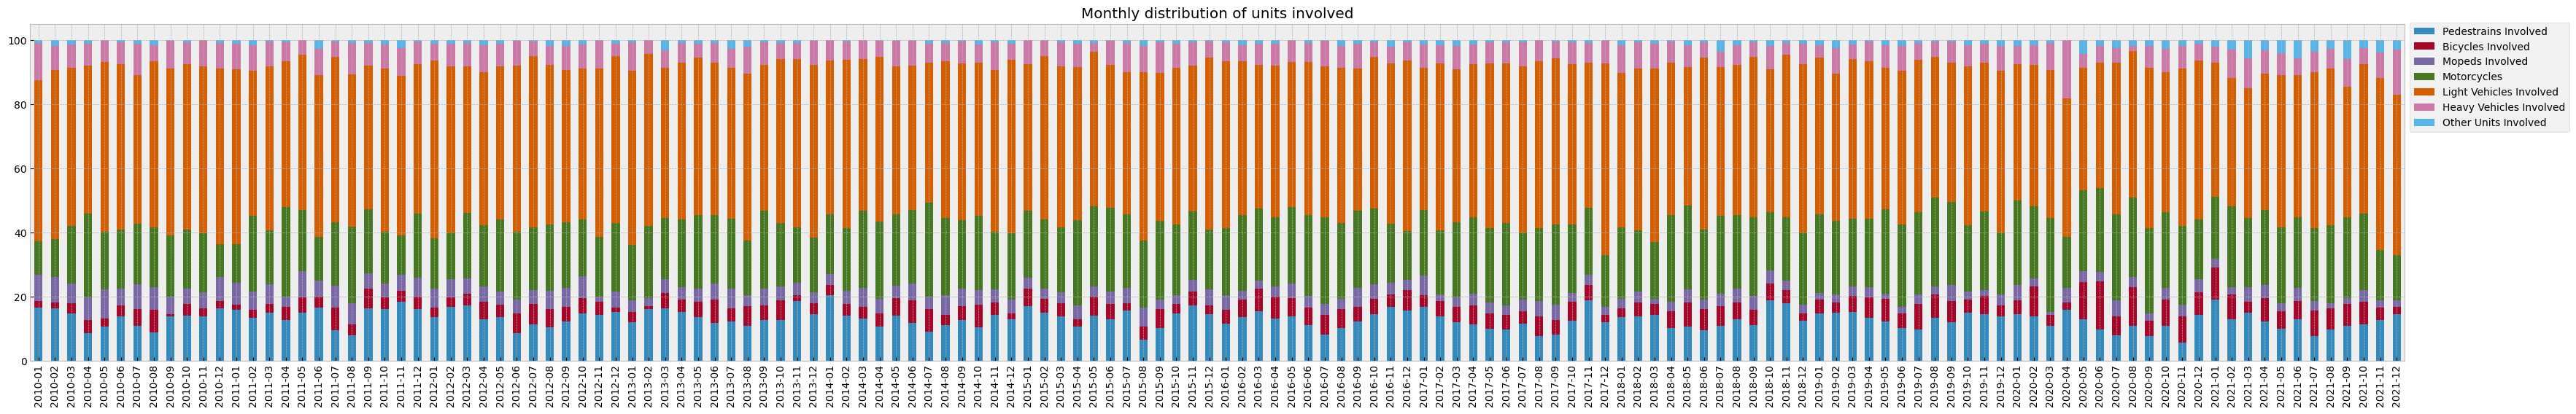

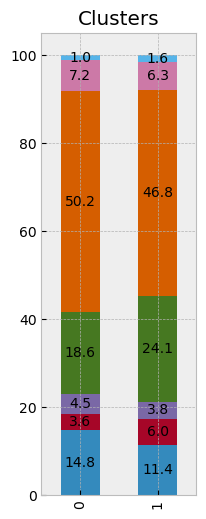

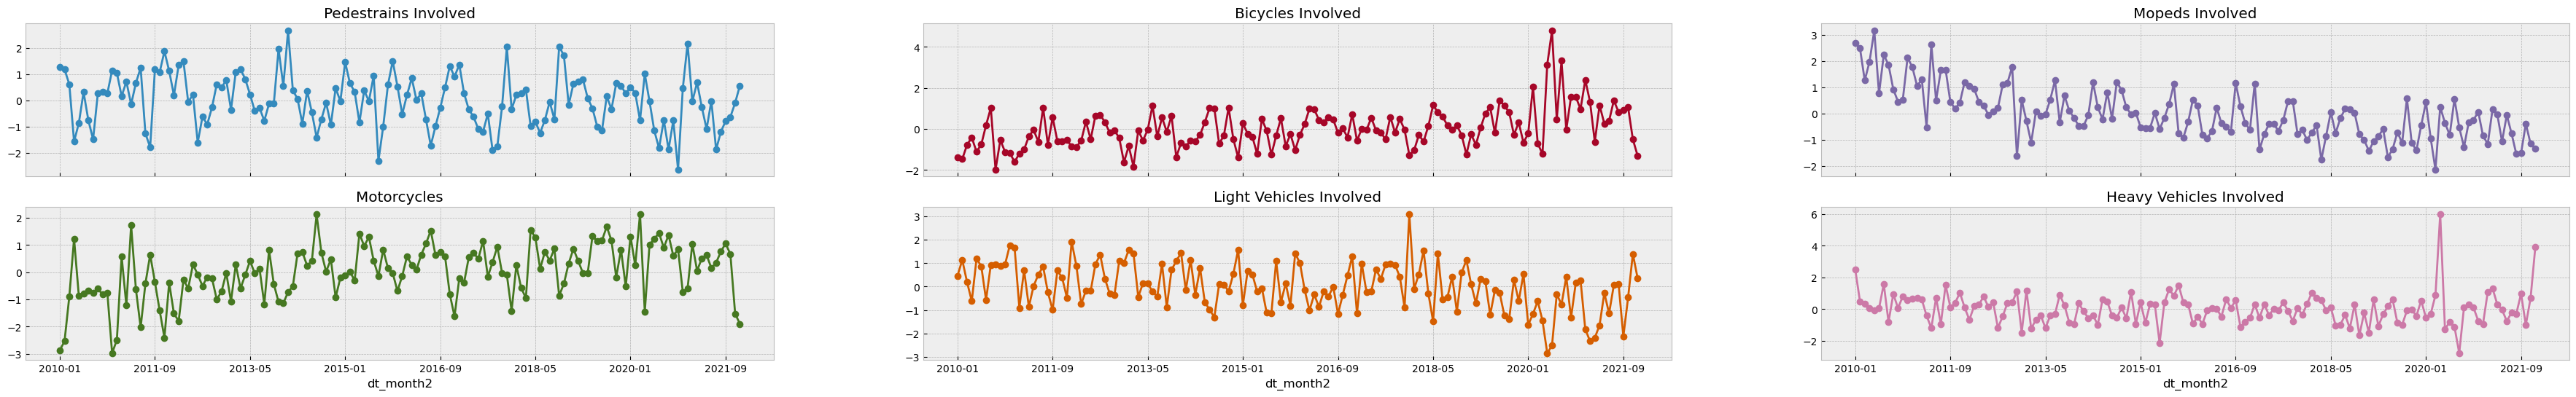

In [73]:
# Monthly distribution
feats_ag = ''' 
Pedestrains Involved
Bicycles Involved
Mopeds Involved
Motorcycles
Light Vehicles Involved 
Heavy Vehicles Involved
Other Units Involved
'''
feats_ag = [f.strip() for f in feats_ag.split('\n') if f.strip() != '']

# calculate
df['dt_month2'] = df['dt_month'].astype(str).str[:7]
feats_gr = ['dt_month2']
df2 = df.groupby(feats_gr)[feats_ag].sum()
df2 = 100*df2.apply(lambda x: x / x.sum(), axis = 1)

x = df2.copy()
for f in x.columns:
    x[f] = (x[f] - x[f].mean())/x[f].std()
    
# plotting
p = df2.plot(figsize = (42,6), kind = 'bar', stacked = True, legend = True, title = 'Monthly distribution of units involved', xlabel = '')
_ = p.legend(bbox_to_anchor=(1., 1.02))
# for c in p.containers:
#     labels = [f'{v.get_height():.1f}' if v.get_height() > 0 else '' for v in c]
#     p.bar_label(c, labels=labels, label_type='center')
    
# Kmeans clustering
from sklearn.cluster import KMeans
np.random.seed(2017)
kmeans = KMeans(n_clusters=2)
kmeans.fit(x)
df2['cluster'] = kmeans.labels_
# display(df2)

# plot clusters
df3 = df2.groupby('cluster').mean()
p = df3.plot(figsize = (2,6), kind = 'bar', stacked = True, legend = False, title = 'Clusters', xlabel = '')
# _ = p.legend(bbox_to_anchor=(1., 1.))
for c in p.containers:
    labels = [f'{v.get_height():.1f}' if v.get_height() > 0 else '' for v in c]
    p.bar_label(c, labels=labels, label_type='center')
    
# plot z-scores
x1 = x.iloc[:,:-1]
_ = x1.plot(subplots = True, title = list(x1.columns), legend = False, layout = (2,3), figsize = (45,6), style = 'o-')